# **Applied Data Science Capstone Project:**

# *Investigating Denver Metro Area Locations for a New Competitive Gymnastics Gym* 

## I. INTRODUCTION

## I.A. Background

The Denver Metro Area is experiencing rapid growth and expansion resulting in an urban sprawl in most directions.  Housing has been a building priority to accommodate the influx of new residents; however, the development of grocery stores, shopping venues, child care, gyms, recreational outlets, and other services has lagged behind. The absence of available resources forces individuals to spend more time and travel further distances on congested highways and roads to obtain the goods and services needed.

## I.B. Problem

Competitive gymnastics gyms are one of many recreational facilities absent in several areas with newer, but quick growth with city plans for additional in the coming decades. Most gymnastics programs begin afternoon practices between 3:30 PM to 4:00 PM due to allow the creation of as many recreational and developmental class offerings as possible. The start times are also designed to minimize late practice end times for student-athletes in competitive programs which require 3 to 4 hours of training 5 to 6 days per week. The start times of practice become problematic for many students due to the late end times of area public schools. Most schools do not dismiss students for the day until 3:30 PM or 3:45 PM. The release times make arrival at a facility for afterschool programs almost impossible for most families due to the distance and travel time required to reach a facility. Road congestion on main highways and neighborhood streets create a commute of 20 minutes to an hour from certain locations to a gym. Between the 15 minutes for the student pick-up line, commute, and time for changing clothes and pre-workout snack, the earliest the average student-athlete can begin practice is 4:15 PM to 4:30 PM if a facility is located in or close to their neighborhood. Other students with longer travel times due to facilities being even further away cannot begin afternoon practices until as late as 5:00 PM to 5:30 PM. These late times limit the number of class offerings for recreational and developmental programs geared toward younger athletes reducing the profits of businesses. Moreover, a four hour practice length for competitive gymnasts starting between 4:30 PM and 5:30 PM creates an end time of 8:30 PM to 9:30 PM. Student-athletes must then commute home, eat dinner, and complete homework resulting in an incredibly late bedtime considering the early school start times of 7:30 AM to 7:45 AM. 

The difficult scheduling forces many families to make the decision to quit the programs instead of pursuing the sport. The poor athlete retention rate in turn diminishes the revenue of the gyms. The proper location of a new competitive gymnastics gym would be highly profitable by allowing more athletes the opportunity to pursue the sport and continue for more years and at higher levels.


## I.C. Interest

The results of a comprehensive project pertaining to ideal areas for a new competitive gymnastics gym could appeal to several audiences. Current gym owners may use the report to evaluate the possibility of opening an additional location of their program. They may also use the results to determine a better location for their facility to optimize profits when needing to relocate due to leases expiring or growth in their current location resulting in the need for a larger facility. State, county, and city departments and groups seeking to create grants and incentives for recreational opportunities to expand into underserved communities may also use a report such as this. The data can easily be adapted for other types of services as well including dance studios, martial arts facilities, and other sports programs making the base demographic and neighborhood data applicable for many similar applications to recreational outlets for youth in a community.

## II. DATA REQUIREMENTS

The determination of an ideal location for a new competitive gymnastics facility relies on many different data parameters. The data sets for the scope of this project include the following:
* Zip Codes for the Denver-Aurora Metropolitan Statistical Area 
    * The list of zip codes for the Denver-Aurora MSA allows focus on the desired area of the state.
    * The list of zip codes for this project was obtained from the Department of Labor as it was the most comprehensive set for obtaining all zip codes located in the Denver-Aurora Metropolitan Statistical Area. Other datasets investigated did not have the correct combination of zip codes and MSA reference or it was not available without payment.
* City and county information corresponding to the zip codes
    * Additional city and county information pertaining to the zip codes creates easier terms to describe locations during discussion.
    * The dataset containing the city and county details for the zip codes was pulled from data.colorado.gov.
* Census demographic statistics for the zip codes including total population, population under 18, number of family households, and median family household income
    * Census demographic statistics in these areas help highlight the areas with the population and income levels to support a recreational facility.
    * The data for the latest Census was not currently available. The dataset used instead was obtained from the 2018 American Community Survey since it was the most recent comprehensive set.
    * This data was accessed from data.colorado.gov.
* Zip code boundaries
    * Geospatial data provides the ability to create maps for a visual of areas of interest.
    * The initial geospatial data investigated for use was located in the demographic dataset from the 2018 American Community Survey. However, the formatting of the geolocation data was not compatible with the extraction method and mapping application being used.
    * Geospatial data was instead used from the Colorado Department of Public Health website as it was formatted properly as a geojson file that could be pulled into a GeoPandas dataframe.
* Locations of current gymnastics gyms
    * The locations of current gymnastics gyms are important to minimize competition with other facilities.
    * Data was initially obtained from the FourSquare API. However, the listings generated were not accurate. Several gyms were not listed. Other facilities were included that were no longer in business or not gymnastics gyms. Even more did not have address information. I attempted to update the data via FourSquare to correct the issues without success. Most entries had not been updated since 2012 or 2013. The dataset was completely useless.
    * In order to create a more accurate view of the spread of gymnastics gyms across the metro area, data was pulled from the Colorado USA Gymnastics website. The facilities located in the dataset were up to date, verified, and registered members of USA Gymnastics which is the governing body for gymnastics facilities in the US.

By combining the data from these parameters, initial overview of potential areas for a new facility.

## III. METHODOLOGY

After identification of usable data sets needed to provide the statistical information in desired locations, the extraction of the data commenced using a variety of methods to demonstrate ability of use. Below is an overview of the attainment of the data for integration into the project to analyze.

### III.A. Statistical Data Extraction


* Zip Codes for the Denver-Aurora Metropolitan Statistical Area 
    * Extracted from Excel file from web address into Pandas Dataframe
* City and county information corresponding to the zip codes
    * Downloaded json file and saved in IBM Cloud Storage
    * Created access connection to project
    * Extracted data from json file into Pandas Dataframe
* Census demographic statistics for the zip codes
    * Imported data through department's API using recommended client from website for Python
    * Loaded desired statistical data into Pandas Dataframe
* Zip code boundaries
    * Extracted geojson data from website into GeoPandas Dataframe to preserve correct formatting of geospatial data
* Data from all resources was combined into a single Pandas Dataframe
    * Missing data was replaced and zip codes not corresponding to residential neighborhoods were dropped (ie. zip codes reserved for single large entities and business districts with no households or individuals under 18). 

### III.B. GeoLocation Data Extraction

* Central points for zip codes and Denver area created
    * The Geocoder Nominatim was used to find the central coordinates for zip codes and the Denver metro area.
* Creation of maps
    * A map of the Denver metro area was created using Folium.
    * Choropleth map layers with total population and household income for each zip code were added to the base Denver map using Folium to easily visualize what zip codes have the highest populations and highest income levels.
    * Central points from the Geocoder were added to the map using Folium.
    * Due to the poor location of the points generated through the Geocoder, the centroid function was used to create better reference points for the center of the zip code boundaries. The centroids were also added to the map.
* Locations of current gymnastics gyms
    * FourSquare API data for the search category "gymnastics" was requested in json format.
    * Data was loaded into Pandas Dataframe.
    * Locations of the FourSquare listed venues were reviewed and added to the map using Folium.
    * More accurate listings of currently registered gymnastics gyms were downloaded as an Excel file and saved in IBM Cloud Storage
    * Data from the Excel file was loaded into a Pandas Dataframe.
    * Geolocation data was created using the Geocoder, Nominatim, and coordinates were added to the map using Folium.
    * Visualization of the current gymnastics gym locations in comparison to the zip codes with certain population sizes and income levels gave initial overview of the areas currently supporting gymnastics programs.

### III.C. Data Analysis

* Analysis of zip codes with gymnastics gyms
    * Counts of gyms for each zip code were performed to see how many gyms each area was currently supporting.
    * The number of youth under 18 per gym in a zip code was determined to see the density of youth in areas with current gyms. 
    * The average gym in the US is approximately 18,000 square feet which will only support the enrollment of 1,800 students when time slots are optimized and scheduled appropriately. Even though the majority of youth in a given area will not participate specifically in gymnastics, other potential offerings such as camps, birthday parties, Kids Night Out events, space rentals to local school cheerleading squads, after school programs, Ninja, Parkour, and Warrior course trainings appeal to a larger crowd of potential clients in the neighborhood and surrounding zip codes.
* K-Means clustering 
    * K-Means clustering was performed on the data to determine groupings of zip codes where gyms were currently located and successful. By seeing which zip codes were similar to the ones currently containing gyms, other potential zip codes can be identified that do not have gyms but the same other parameters that are able to support programs.
* Analysis of clusters
    * Pandas Dataframes were created for each cluster.
    * The average population, income, and total gyms for each cluster were calculated.
    * A Pandas Dataframe was created summarizing the totals for each cluster to give a simple comparison chart.
* Comprehensive map
    * A final comprehensive map was created with Choropleth layers for each cluster with the color intensity based on income.
    * The locations of current gymnastics gyms was also added along with the layers for total population and household income initially created.
    * The combination of layers can be viewed to reveal which areas may best be suited to support a new gymnastics facility and avoid competition from current locations.

## IV. RESULTS

### IV.A. Averages of Zip Code Clusters

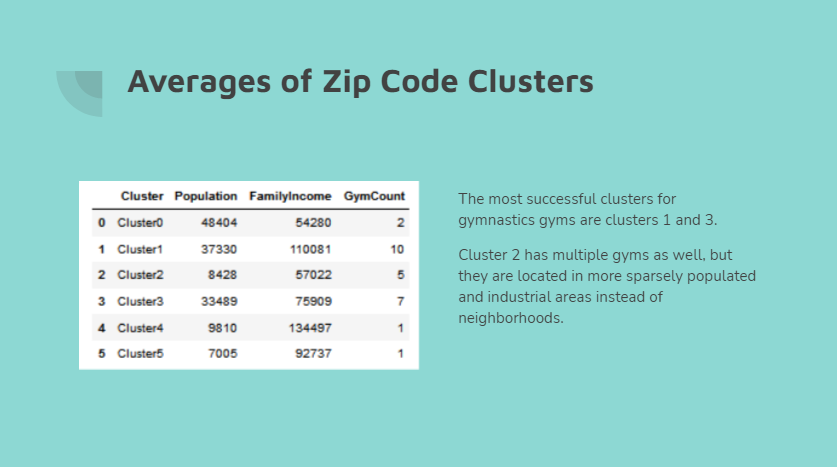

The most successful clusters for gymnastics gyms are clusters 1 and 3.
Cluster 2 has multiple gyms as well, but they are located in more sparsely populated and industrial areas instead of neighborhoods.

### IV.B. Cluster Maps

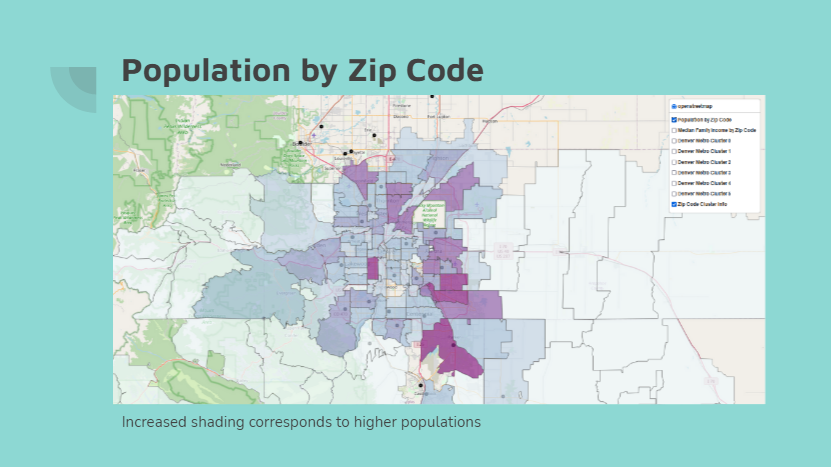

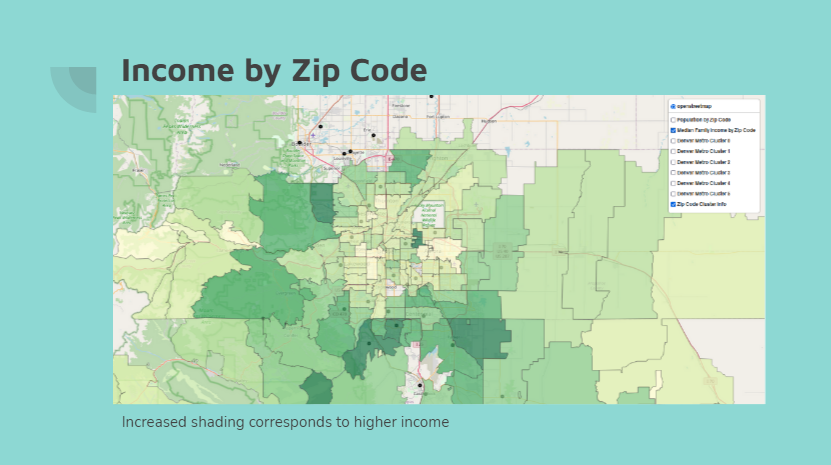

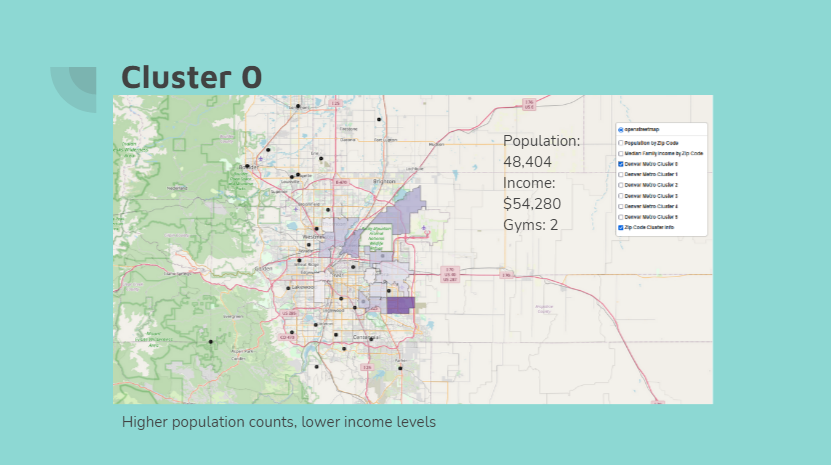

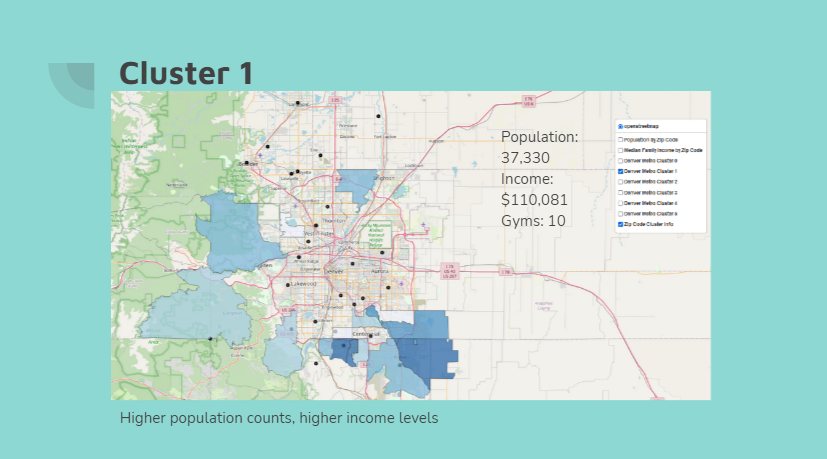

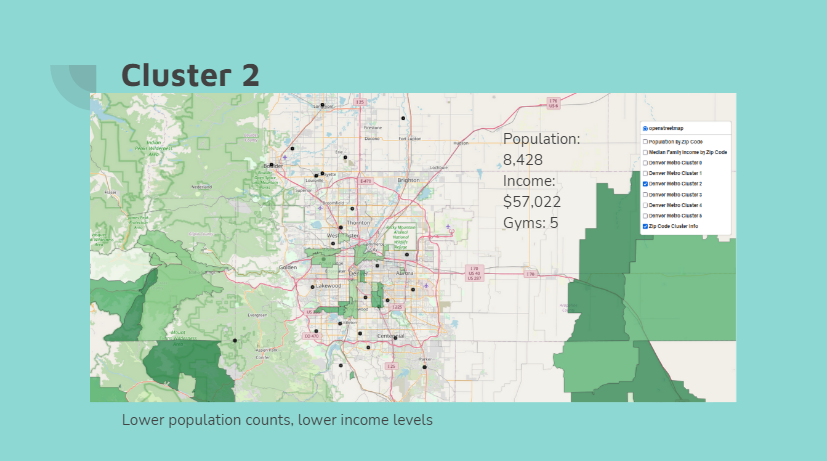

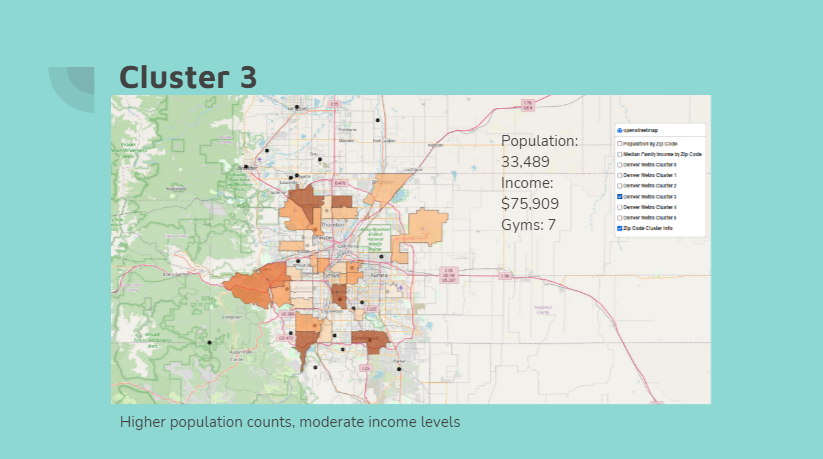

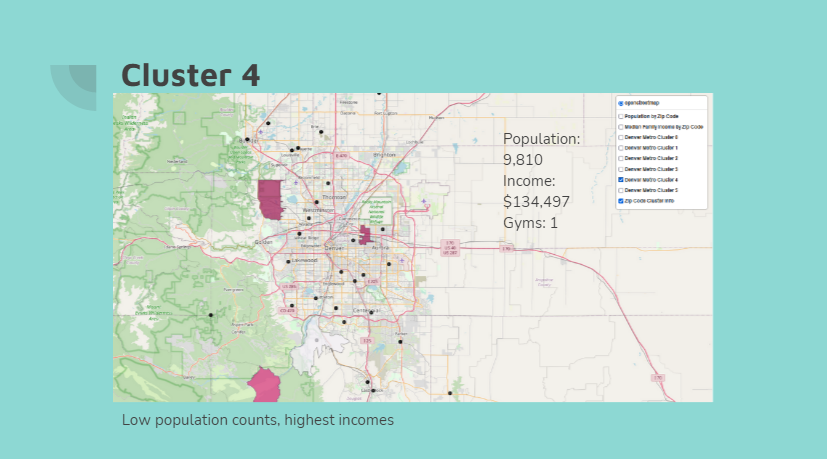

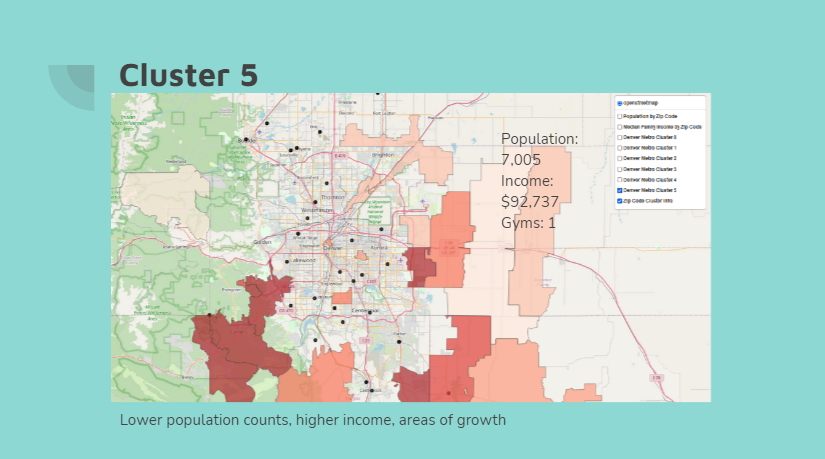

## V. DISCUSSION

As indicated by the cluster averages and summary maps, the best zip codes for gymnastics gyms have higher population counts and moderate to high income levels such as those in clusters 1 and 3. Considering the outward expansion of the Denver Metro Area, zip codes in cluster 5 should also be investigated for current growth rates and city planning projects to determine how quickly the population will reach similar levels to those of clusters 1 and 3. Due to the natural geography of the land and location of a major and expanding airport, more development is expected in the flat eastern plains instead of the foothills and mountains of the western side of the metro area. Additional factors to consider are proximity and access to main viaducts including Interstate 70 and Highway 470. Tax incentives for developing areas and costs of land and building or leasing of warehouse space are also important considerations for the decision of a final location. Based upon the current cluster data, maps, and initial searching regarding development plans, the northeastern area of the Denver Metro Area near the airport around the intersection of Interstate 70 and Highway 470 appears to be a top choice. According to the Denver Regional Committee of Governments the building of a large aerotropolis development with multiple neighborhoods will result in nearly 75,000 new housing units and 210,000 additional residents upon completion. 

## VI. REFERENCES

* Department of Labor
    * https://www.dol.gov/owcp/regs/feeschedule/fee/fee11/fs11_gpci_by_msa-ZIP.xls
* Colorado Information Marketplace 
    * data.colorado.gov
* Colorado Department of Public Health
    * https://www.cohealthmaps.dphe.state.co.us/arcgis/rest/services/OPEN_DATA/cdphe_geographic_analysis_boundaries/MapServer/10/query?outFields=*&where=1%3D1&f=geojson
* FourSquare API
    * https://www.foursquare.com
* Colorado USA Gymnastics
    * http://www.cousag.com/ClubList.php
* Denver Post
    * https://www.denverpost.com/2018/03/11/denver-aurora-highlands-project/
* Denver Regional Committee of Governments
    * https://drcog.org/sites/drcog/files/resources/E1-Link%20CO%20Aerotropolis%20Executive%20Summary%20DRAFT_2016-03-10_0.pdf

## VII. RESOURCES 

* Full Notebook
    * https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/378546d4-0500-46d2-a591-eabacc6e6bc6/view?access_token=43fbc20414b8444d273015a62eccd161d5cbbec8e9e74cbd15f1688a8776bb7e
* Google Slides Presentation
    * https://docs.google.com/presentation/d/e/2PACX-1vTvShdm8Cj9G9Pc-Vf6NTggzuLWkzWiHNMq1IjhJK5ZktxGvVl9fuUimti2veelapI7V1fGCgBmpp7X/pub?start=true&loop=true&delayms=10000